###### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### IMPORTING DATA

In [2]:
df = pd.read_csv("E:\Machine Learning & Statistics\ML CAPSTONE PROJECT/kickstarter.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


###### CHECKING UNIQUE VALUES

In [5]:
for column in df.columns[1:]:
    print('\n\n',column,'\n',df[column].unique())



 name 
 ['The Songs of Adelaide & Abullah'
 'Greeting From Earth: ZGAC Arts Capsule For ET' 'Where is Hank?' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']


 category 
 ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 

###### CHECKING FOR NULL VALUES

In [6]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df['name'].mode()

0    New EP/Music Development
dtype: object

In [8]:
df[df['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [9]:
# Dropping NAN Names as the name and categoriesd doesnt match

In [10]:
df = df[df['name'].notna()]

In [11]:
### DEALING WIITH NAN VALUES OF USD PLEDGED FEATURE

In [12]:
## REPLACING NAN VALUES WITH MEDIAN AS IT HAS A LOT OF OUTLIARS

In [13]:
median = df['usd pledged'].median()
df['usd pledged'].fillna(median,inplace=True)

In [14]:
df.isnull().mean()

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

In [15]:
## NOW THERE ARE NO VALUES IN OUT DF

###### EXPLORATORY DATA ANALYSIS

In [16]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786570e+05,3.786570e+05,3.786570e+05,378657.000000,3.786570e+05,3.786570e+05,3.786570e+05
mean,1.074732e+09,4.908068e+04,9.683080e+03,105.618544,6.970199e+03,9.059018e+03,4.545425e+04
std,6.190872e+08,1.183397e+06,9.563651e+04,907.189767,7.824768e+04,9.097382e+04,1.152956e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382499e+08,2.000000e+03,3.000000e+01,2.000000,1.900000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947650e+02,6.243800e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378657 non-null int64
name                378657 non-null object
category            378657 non-null object
main_category       378657 non-null object
currency            378657 non-null object
deadline            378657 non-null object
goal                378657 non-null float64
launched            378657 non-null object
pledged             378657 non-null float64
state               378657 non-null object
backers             378657 non-null int64
country             378657 non-null object
usd pledged         378657 non-null float64
usd_pledged_real    378657 non-null float64
usd_goal_real       378657 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 46.2+ MB


In [18]:
con_var = []
cat_var = []

for feature in df.columns:
    if df[feature].dtype !='object' and len(df[feature].unique()) >25:
        con_var.append(feature)
    else:
        cat_var.append(feature)

In [19]:
print("Continuous Variables ARE --- \n",con_var)
print("\n\nCategorical Variables ARE --- \n",cat_var)

Continuous Variables ARE --- 
 ['ID', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


Categorical Variables ARE --- 
 ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']


#### ANALYSING CATEGORICAL VARIABLES

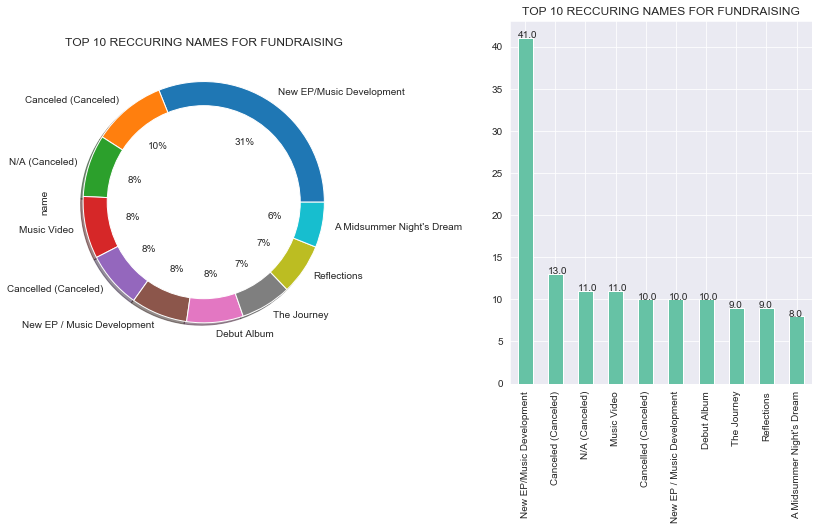

In [70]:
sns.set_style("darkgrid")

fig,(ax1,ax2) = plt.subplots(1,2)
#AXIS-1
ax1.set_title("TOP 10 RECCURING NAMES FOR FUNDRAISING")
ax1.set_ylabel("")
vc = df['name'].value_counts()[:10]
my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
vc.plot('pie',ax=ax1,figsize=(12,8),cmap='tab10', autopct='%1.0f%%',shadow=True)
ax1.add_artist(my_circle) # adding circle to axis


# AXIS -2
ax2.set_title("TOP 10 RECCURING NAMES FOR FUNDRAISING")
ax = vc.plot('bar',ax=ax2,figsize=(12,8),cmap='Set2')


for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

plt.tight_layout(pad=3)
plt.show()

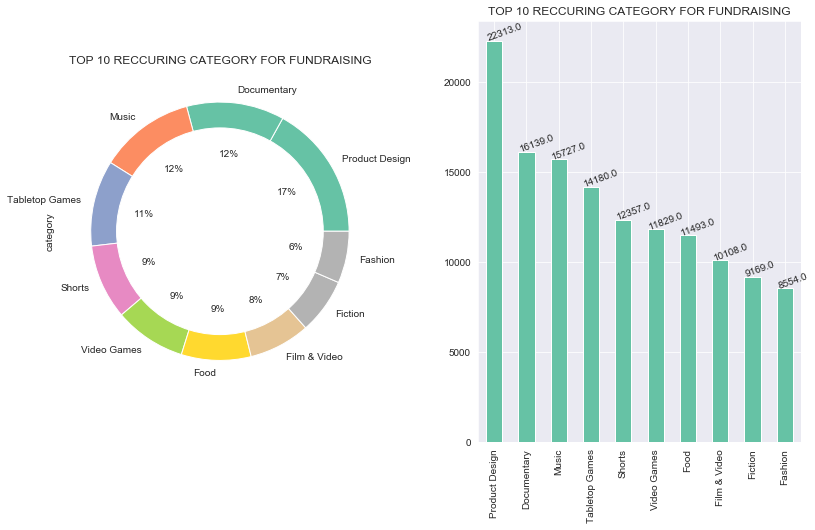

In [71]:
sns.set_style("darkgrid")

fig,(ax1,ax2) = plt.subplots(1,2)
# AXIS-1
ax1.set_title("TOP 10 RECCURING CATEGORY FOR FUNDRAISING")
vc = df['category'].value_counts()[:10]
ax1.set_ylabel("")
vc.plot('pie',figsize=(10,6),ax=ax1,cmap='Set2', autopct='%1.0f%%')
my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
ax1.add_artist(my_circle) # adding circle to axis


# AXIS-2
ax2.set_title("TOP 10 RECCURING CATEGORY FOR FUNDRAISING")
ax = vc.plot('bar',figsize=(12,8),ax=ax2,cmap='Set2')

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=20)

fig.tight_layout(pad=3)
plt.show()

In [273]:
### HERE WE SEE THAT MOST OF THE FUNDING REQUESTS ARE OF CATEGORY PRODUCT DESIGN - DOCUMENTARY - MUSIC ...

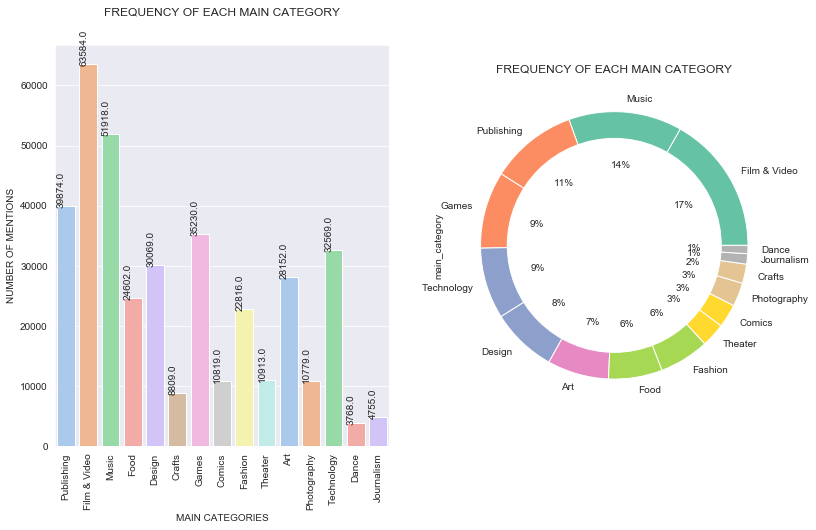

In [75]:
sns.set_style("darkgrid")

fig,(ax1,ax2) = plt.subplots(1,2)

# AXIS - 1
ax1.set_title("FREQUENCY OF EACH MAIN CATEGORY",pad=30)
ax = sns.countplot(df['main_category'],ax=ax1,palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("MAIN CATEGORIES")
ax.set_ylabel("NUMBER OF MENTIONS")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100),rotation=90)

# AXIS - 2
ax2.set_title("FREQUENCY OF EACH MAIN CATEGORY")
ax2.set_ylabel("")
vc = df['main_category'].value_counts()
vc.plot('pie',ax=ax2,figsize=(12,8),cmap='Set2',autopct='%1.0f%%')
my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
ax2.add_artist(my_circle) # adding circle to axis

plt.tight_layout(pad=3)
plt.show()

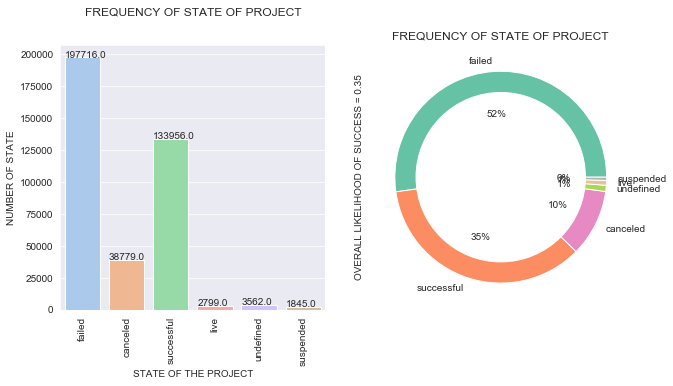

In [74]:
sns.set_style("darkgrid")

fig,(ax1,ax2) = plt.subplots(1,2)

# AXIS - 1
ax1.set_title("FREQUENCY OF STATE OF PROJECT",pad=30)
ax = sns.countplot(df['state'],ax=ax1,palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("STATE OF THE PROJECT")
ax.set_ylabel("NUMBER OF STATE")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))

# AXIS - 2
data = df['state'].value_counts()
success_ratio = (data.successful)/(data.values.sum())
success_ratio = str(success_ratio)[:4]
ax2.set_title("FREQUENCY OF STATE OF PROJECT")
vc = df['state'].value_counts()
vc = vc.plot('pie',ax=ax2,figsize=(10,6),cmap='Set2', autopct='%1.0f%%')
vc.set_ylabel("OVERALL LIKELIHOOD OF SUCCESS = {}".format(success_ratio))
my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
ax2.add_artist(my_circle) # adding circle to axis

plt.tight_layout(pad=3)
plt.show()

#### MAIN CATEGORY AND ITS STATE METRICS

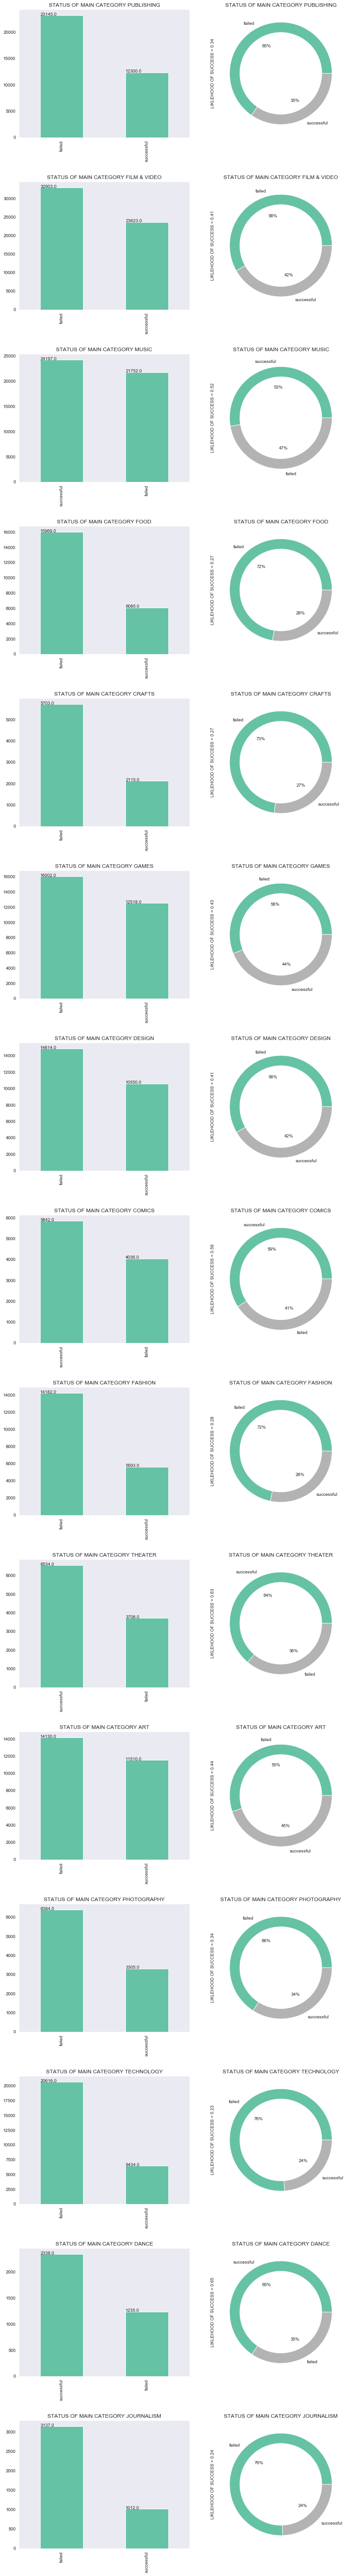

<Figure size 432x288 with 0 Axes>

In [72]:
sns.set_style('dark')

fig,ax = plt.subplots(15,2) 

# LIST OF AXES
axis = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1],ax[3,0],ax[3,1],ax[4,0],ax[4,1],ax[5,0],ax[5,1],ax[6,0],ax[6,1],ax[7,0],ax[7,1],ax[8,0],ax[8,1],ax[9,0],ax[9,1],ax[10,0],ax[10,1],ax[11,0],ax[11,1],ax[12,0],ax[12,1],ax[13,0],ax[13,1],ax[14,0],ax[14,1]]  # List of AXES

options = ['successful','failed']
sample = df[df['state'].isin(options)]
cats = sample['main_category'].unique()

# looping through multiple category
index = 0
for cat in cats:                    
    x = sample[sample['main_category']==cat]  # x -- > df with a single main_category
    data = x['state'].value_counts()   # value_count of status (key val pair)
    
    #AXIS-COL-1
    axis[index].set_title("STATUS OF MAIN CATEGORY {}".format(cat.upper()))
    ax = data.plot("bar",cmap='Set2',ax=axis[index],figsize=(12,80))
    
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
    index+=1
    
    # AXIS-COL-2
    axis[index].set_title("STATUS OF MAIN CATEGORY {}".format(cat.upper()))
    data.plot('pie',ax=axis[index],figsize=(12,80),cmap='Set2',autopct='%1.0f%%') # plotting the chart
    my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
    axis[index].add_artist(my_circle) # adding circle to axis
    # Success Ratio
    success_ratio = str((data.successful)/(data.values.sum()))
    success_ratio = "LIKLEHOOD OF SUCCESS = " + success_ratio[0:4]
    axis[index].set_ylabel(success_ratio,fontdict={'fontweight':12})
    index+=1
    
plt.tight_layout(pad=3)
plt.show()
plt.savefig('Desktop\pic')

###### COUNTRIES AND THEIR STATE METRICS

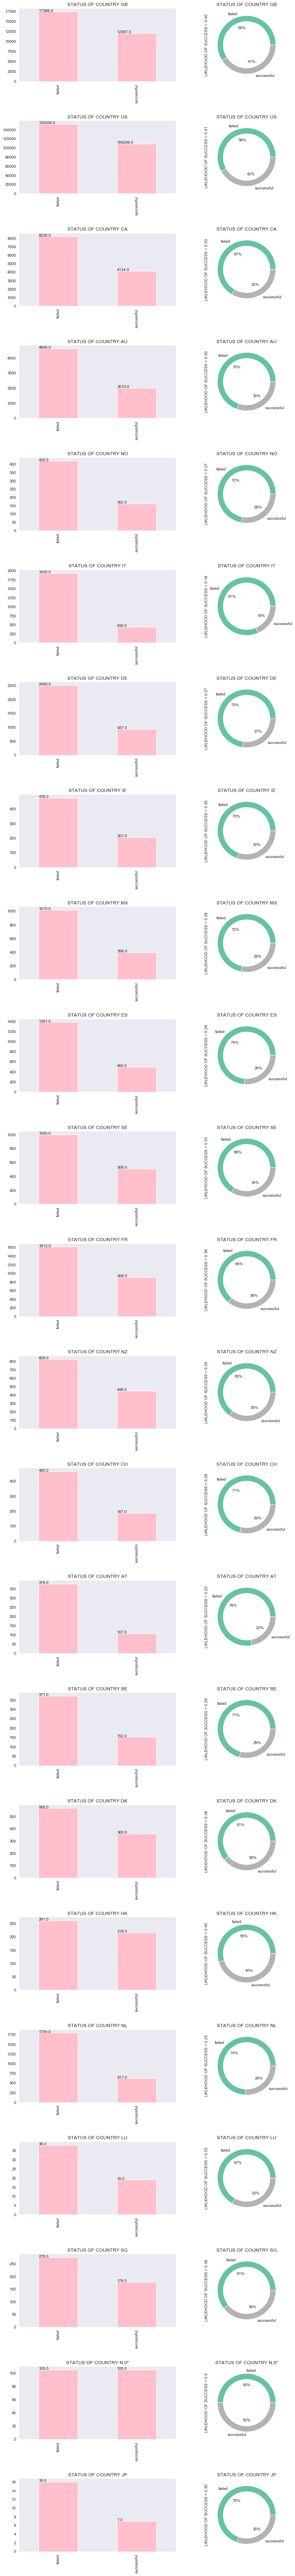

In [73]:
sns.set_style('dark')

fig,ax = plt.subplots(23,2,figsize=(12,90)) 

# LIST OF AXES
axis = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1],ax[3,0],ax[3,1],ax[4,0],ax[4,1],ax[5,0],ax[5,1],ax[6,0],ax[6,1],ax[7,0],ax[7,1],ax[8,0],ax[8,1],ax[9,0],ax[9,1],ax[10,0],ax[10,1],ax[11,0],ax[11,1],ax[12,0],ax[12,1],ax[13,0],ax[13,1],ax[14,0],ax[14,1],ax[15,0],ax[15,1],ax[16,0],ax[16,1],ax[17,0],ax[17,1],ax[18,0],ax[18,1],ax[19,0],ax[19,1],ax[20,0],ax[20,1],ax[21,0],ax[21,1],ax[22,0],ax[22,1]]  # List of AXES

options = ['successful','failed']
sample = df[df['state'].isin(options)]
cats = sample['country'].unique()

# looping through multiple category
index = 0
for cat in cats:                    
    x = sample[sample['country']==cat]  # x -- > df with a single main_category
    data = x['state'].value_counts()   # value_count of status (key val pair)
    
    #AXIS-COL-1
    axis[index].set_title("STATUS OF COUNTRY {}".format(cat.upper()))
    ax = data.plot("bar",color='pink',ax=axis[index])
    
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
    index+=1
    
    # AXIS-COL-2
    axis[index].set_title("STATUS OF COUNTRY {}".format(cat.upper()))
    data.plot('pie',ax=axis[index],cmap='Set2',autopct='%1.0f%%') # plotting the chart
    my_circle = plt.Circle((0, 0), .8, color='white') # plotting circle
    axis[index].add_artist(my_circle) # adding circle to axis
    # Success Ratio
    success_ratio = str((data.successful)/(data.values.sum()))
    success_ratio = "LIKLEHOOD OF SUCCESS = " + success_ratio[0:4]
    axis[index].set_ylabel(success_ratio,fontdict={'fontweight':12})
    index+=1
    
plt.tight_layout(pad=3)
plt.show()

In [6]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


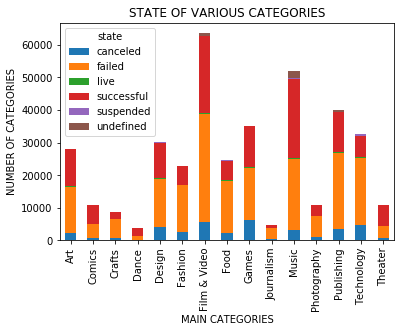

In [12]:
x = pd.crosstab(df['main_category'],df['state'])
x.plot(kind='bar',stacked=True)
plt.title("STATE OF VARIOUS CATEGORIES")
plt.xlabel("MAIN CATEGORIES")
plt.ylabel("NUMBER OF CATEGORIES")
plt.show()

In [278]:
### ANALYSIS ON CONTINUOUS VARIABLE

In [279]:
con_var.remove("ID")

In [280]:
cat_var

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'launched',
 'state',
 'country']

In [281]:
con_var

['goal',
 'pledged',
 'backers',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

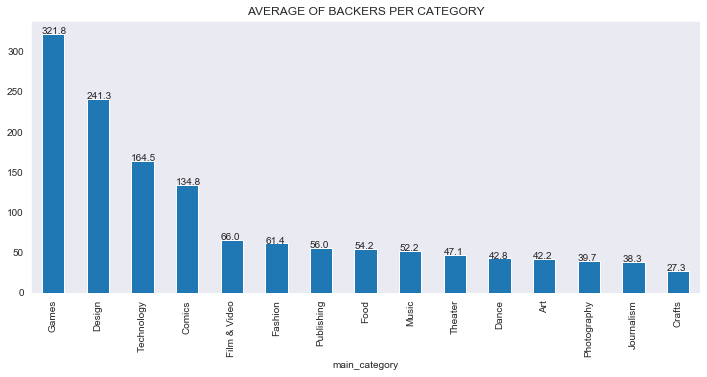

In [282]:
# AVERAGE NUMBER OF BACKERS PER CATEGORY
plt.figure(figsize=(12,5))
ax = df.groupby(['main_category'])['backers'].mean().sort_values(ascending=False).plot('bar')
ax.set_title("AVERAGE OF BACKERS PER CATEGORY")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))

plt.show()

###### USD PLEDGED AND USD GOAL PER MAIN CAREGORY  COMPARISION 

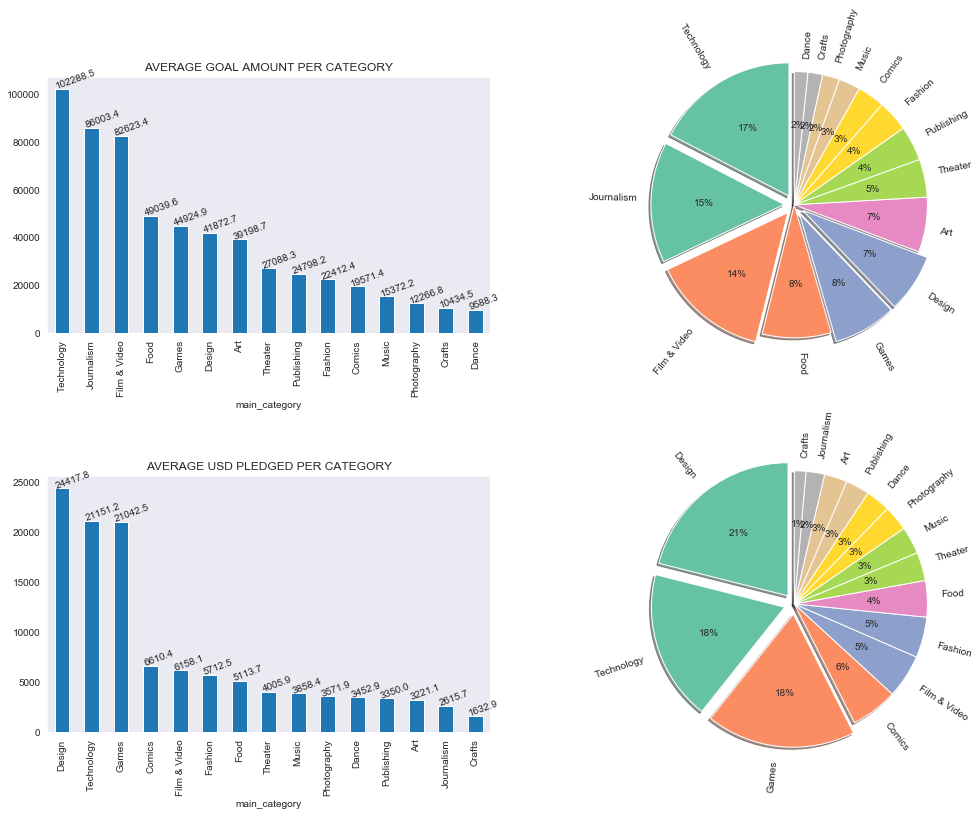

In [283]:
# MEDIAN USD PLEDGED PER CATEGORY
fig,axes = plt.subplots(2,2,figsize=(15,12))

# AXIS-1 GOAL
data = df.groupby(['main_category'])['usd_goal_real'].mean().sort_values(ascending=False)
ax = data.plot('bar',ax=axes[0,0])
ax.set_title("AVERAGE GOAL AMOUNT PER CATEGORY")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=20)

data.plot('pie',startangle=90,ax=axes[0,1],cmap='Set2',radius=1.3,rotatelabels=45, autopct='%1.0f%%',explode=(0.1,0.1,0.1,0,0.1,0.1,0,0,0,0,0,0,0,0,0),shadow=True)
axes[0,1].set_ylabel("")

# AXIS-2 PLEDGED
data = df.groupby(['main_category'])['usd_pledged_real'].mean().sort_values(ascending=False)
ax = data.plot('bar',ax=axes[1,0])

axes[1,0].set_title("AVERAGE USD PLEDGED PER CATEGORY")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=20)

data.plot('pie',startangle=90,ax=axes[1,1],cmap='Set2',radius=1.3,rotatelabels=45, autopct='%1.0f%%',explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True)
axes[1,1].set_ylabel("")

plt.tight_layout(pad=3)
plt.show()

###### FEATURE ENGINEERING

###### Checking Outliars

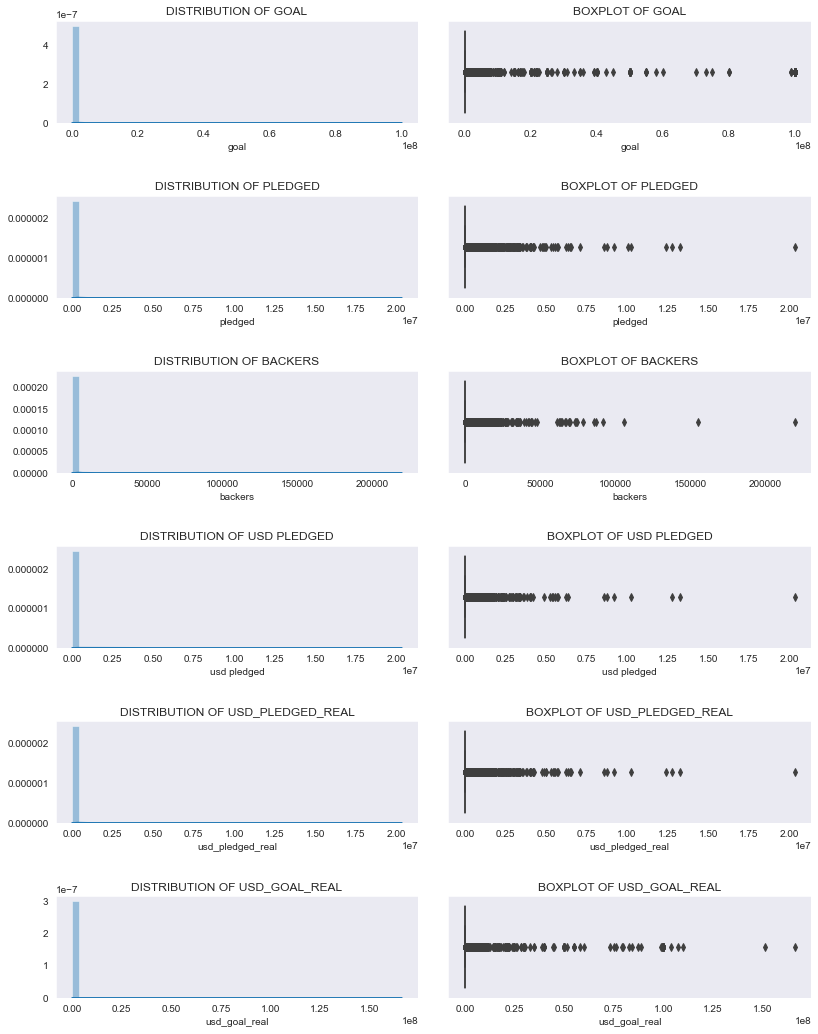

In [284]:
sns.set_style("dark")
fig,ax = plt.subplots(6,2,figsize=(12,15))

row=0
for var in con_var:
    # Title
    ax[row,0].set_title("DISTRIBUTION OF {}".format(var.upper()))
    ax[row,1].set_title("BOXPLOT OF {}".format(var.upper()))
    
    # Plots
    sns.distplot(df[var],ax=ax[row,0])
    sns.boxplot(df[var],ax=ax[row,1])
    
    # Shif To Next Row
    row+=1
    
plt.tight_layout(pad=3)
plt.show()

###### Encoding ALL Categorical Variables

In [5]:
def filter_date(df,feature):
    
    global day_list,month_list,year_list,hour_list,min_list
    day_list = []
    month_list = []
    year_list = []
    hour_list = []
    min_list = []
    
    
    for data in df[feature]:
        if feature == 'deadline':
            data = data.split(" ")
            # Date Data
            date_data = data[0].split("-")
            # Storing data in list
            day_list.append(date_data[2])
            month_list.append(date_data[1])
            year_list.append(date_data[0])
        else:
            data = data.split(" ")
            # Date Data
            date_data = data[0].split("-")
            # Storing data in list
            day_list.append(date_data[2])
            month_list.append(date_data[1])
            year_list.append(date_data[0])
            # Time Data
            time_data = data[1].split(":")
            # Storing Time Data
            hour_list.append(time_data[0])
            min_list.append(time_data[1])

###### Filtering Deadline date

In [6]:
filter_date(df,'deadline')

In [7]:
df['deadline_day'] = [int(x) for x in day_list]     # Converting to int and storing it 
df['deadline_month'] = [int(x) for x in month_list] # Converting to int and storing it 
df['deadline_year'] = [int(x) for x in year_list]   # Converting to int and storing it 

###### Filtering Launched Date

In [8]:
filter_date(df,'launched')

In [9]:
df['launched_day'] = [int(x) for x in day_list]     # Converting to int and storing it 
df['launched_month'] = [int(x) for x in month_list] # Converting to int and storing it 
df['launched_year'] = [int(x) for x in year_list]   # Converting to int and storing it 

df['launched_hour'] = [int(x) for x in hour_list]     # Converting to int and storing it 
df['launched_min'] = [int(x) for x in min_list] # Converting to int and storing it 

###### Dropping Unfiltered Columns

In [10]:
df.drop(columns=['deadline','launched','ID'],axis=1,inplace=True)

###### Encoding Currency

In [11]:
dummy = pd.get_dummies(df['currency'],drop_first=True)

In [12]:
df1 = pd.concat([df,dummy],axis=1,join='inner')

In [13]:
df = df1.copy()

In [14]:
del df['currency']

In [15]:
df.columns

Index(['name', 'category', 'main_category', 'goal', 'pledged', 'state',
       'backers', 'country', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real', 'deadline_day', 'deadline_month', 'deadline_year',
       'launched_day', 'launched_month', 'launched_year', 'launched_hour',
       'launched_min', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
       'NOK', 'NZD', 'SEK', 'SGD', 'USD'],
      dtype='object')

In [16]:
df.head()

,name,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,Where is Hank?,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,...,0,0,0,0,0,0,0,0,0,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,...,0,0,0,0,0,0,0,0,0,1


##### Annual Reports

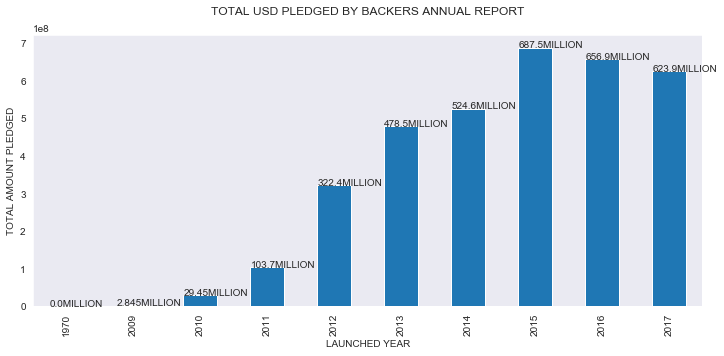

In [297]:
sns.set_style("dark")
plt.figure(figsize=(12,5))
plt.title("TOTAL USD PLEDGED BY BACKERS ANNUAL REPORT",pad=20)
data = df.drop(df[df['launched_year']==2018].index,inplace=False,axis=0)
data = data.groupby("launched_year")['usd_pledged_real'].sum()
ax = data.plot('bar')

ax.set_xlabel("LAUNCHED YEAR")
ax.set_ylabel("TOTAL AMOUNT PLEDGED")

for p in ax.patches:
    height = str(p.get_height()/1000000)[:5] + "MILLION"
    ax.annotate("{}".format(height),(p.get_x(),p.get_height()))
    
plt.show()

In [298]:
df[df['launched_year']==1970]  # CLEARNIGN DATA WITH A WRONG ENTRY

,name,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,5000.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,15000.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,700.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,4000.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,10000.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
273779,Identity Communications Infographic (Canceled),Design,Design,500.0,0.0,canceled,0,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
319002,Student Auditions Music 2015,Publishing,Publishing,1900.0,0.0,suspended,0,CH,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.drop(df[df['launched_year']==1970].index,axis=0,inplace=True)

In [300]:
def annual_category_visualization(df):
    years = sorted(df['launched_year'].unique())[:-1]
    fig,axes = plt.subplots(9,2,figsize=(15,65))
    
    row = 0
    for year in years:
        data = df[df['launched_year']==year]
        
        # PIE CHART
        pie = data['main_category'].value_counts()
        axes[row,0].set_title("TOTAL NUMBER OF CATEGORIES IN {}".format(str(year)))
        axes[row,0].set_xlabel(" ") 
        pie.plot('pie',ax=axes[row,0],autopct='%1.0f%%',cmap='Set2',explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True)
        
        # barchart
        bar = data.groupby("main_category")['usd_pledged_real'].sum().plot('bar',ax=axes[row,1])
        total = "Gross USD PLEDGED "+ str(data['usd_pledged_real'].sum() / 1000000)[:5] + " Million $"
        axes[row,1].set_ylabel("TOTAL AMOUNT PLEDGED PER CATEGORIES IN {}".format(str(year)))
        axes[row,1].set_title(total,pad=20)
        axes[row,1].set_yticklabels('')
        axes[row,1].set_xlabel(" ")
        
        for p in bar.patches:
            height = str(p.get_height()/1000000)[:4] + "Million $"
            bar.annotate("{}".format(height),(p.get_x(),p.get_height()+10000),rotation=45)
        
        row+=1
        
    plt.tight_layout(pad=3)         
    plt.show()

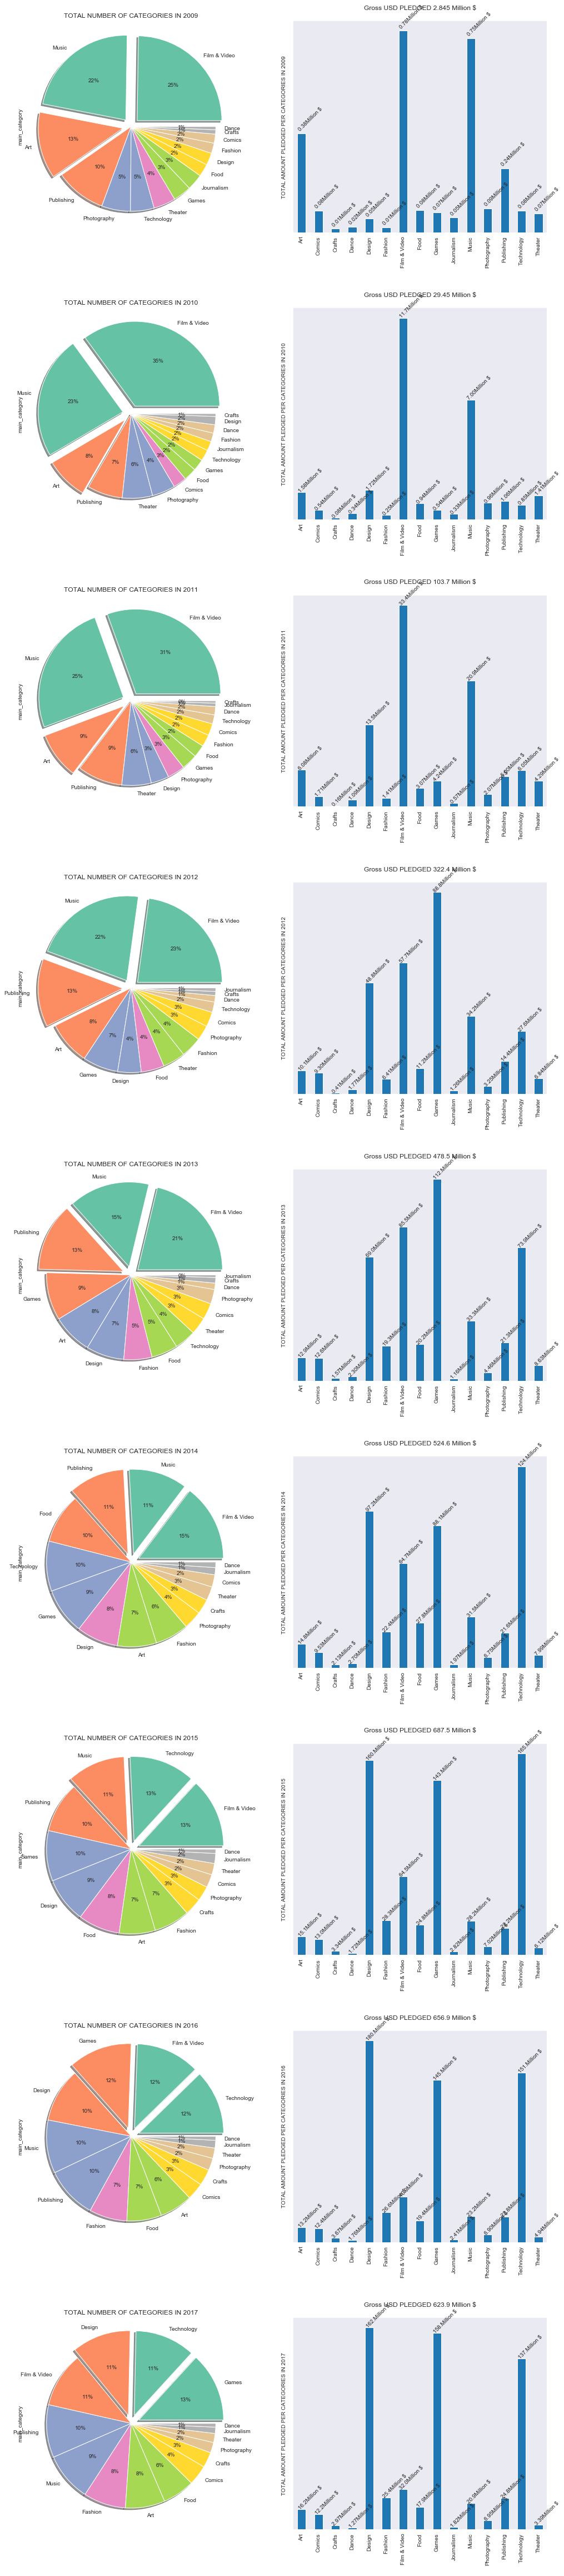

In [301]:
annual_category_visualization(df)

In [302]:
df[df['launched_year']==2015]['main_category'].value_counts()

Film & Video    10202
Technology       9705
Music            8550
Publishing       7482
Games            7418
Design           6705
Food             6162
Art              5321
Fashion          5277
Crafts           2587
Photography      2190
Comics           1922
Theater          1684
Journalism       1472
Dance             623
Name: main_category, dtype: int64

In [303]:
df[df['launched_year']==2017]['main_category'].value_counts()

Games           6893
Technology      5986
Design          5866
Film & Video    5513
Publishing      5254
Music           4857
Fashion         4210
Art             3950
Food            3192
Comics          2002
Crafts          1542
Photography     1039
Theater          903
Journalism       623
Dance            370
Name: main_category, dtype: int64

In [15]:
df1 = df.copy()

##### SUCCESS RATE PER YEAR 

In [16]:
options = ['successful','failed']
sample = df1[df1['state'].isin(options)]
sample.head()

,name,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,Where is Hank?,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,...,0,0,0,0,0,0,0,0,0,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,Monarch Espresso Bar,Restaurants,Food,50000.0,52375.0,successful,224,US,52375.0,52375.0,...,0,0,0,0,0,0,0,0,0,1


###### Encoding State

In [17]:
mapp = {"successful":1,'failed':0}

df = sample.copy()
df['state'] = df['state'].map(mapp)

In [18]:
### PLOT

In [19]:
df.head()

,name,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.0,0.0,0,0,GB,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.0,2421.0,0,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,Where is Hank?,Narrative Film,Film & Video,45000.0,220.0,0,3,US,220.0,220.0,...,0,0,0,0,0,0,0,0,0,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.0,1.0,0,1,US,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,Monarch Espresso Bar,Restaurants,Food,50000.0,52375.0,1,224,US,52375.0,52375.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
list(df.groupby("launched_year").mean()['state'].values)

[0.4910941475826972,
 0.47958650934530644,
 0.5061127744510978,
 0.4649929830032746,
 0.47237293496508603,
 0.3558999089468182,
 0.3212863095967643,
 0.3807108658605859,
 0.425205555171699]

In [310]:
# Number Of Fundraisers data
number_of_fundraisers = []
for year in years:
    x = df[df['launched_year']==year]
    number_of_fundraisers.append(len(x))

In [311]:
df['state'].unique()

array([0, 1], dtype=int64)

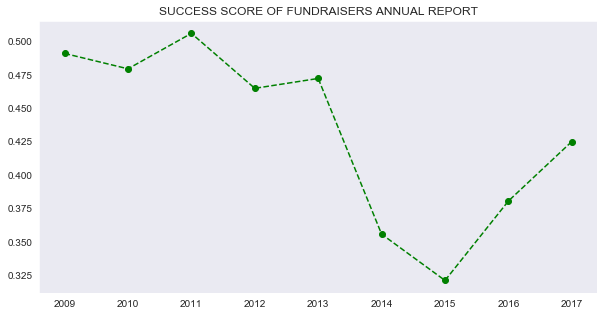

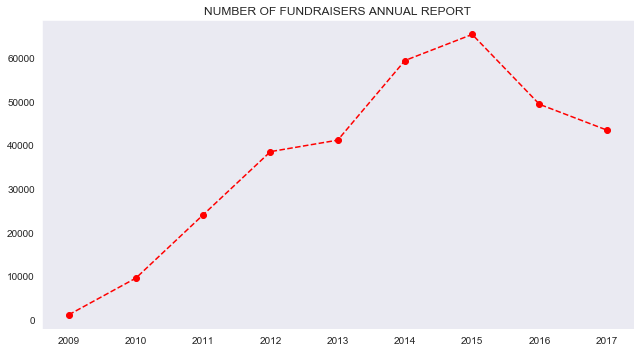

In [312]:
# SUBPLOT - 1
plt.figure(figsize=(10,5))
plt.title("SUCCESS SCORE OF FUNDRAISERS ANNUAL REPORT")
val = list(df.groupby("launched_year").mean()['state'].values)
plt.plot(years,val,linestyle='dashed',marker='o',color='g')

# SUBPLOT - 2
plt.figure(figsize=(9,5))
plt.title("NUMBER OF FUNDRAISERS ANNUAL REPORT")
plt.plot(years,number_of_fundraisers,linestyle='dashed',marker='o',color='r')

plt.tight_layout()
plt.show()

###### Balancing Dataset

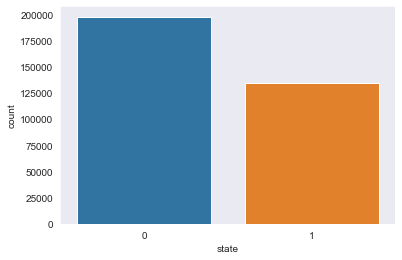

In [20]:
sns.set_style("dark")
sns.countplot(df['state'])

In [21]:
df['state'].value_counts()

0    197716
1    133956
Name: state, dtype: int64

In [22]:
from sklearn.utils import resample
df_major = df[df['state']==0]

df_minor = df[df['state']==1]

df_minor_upsampled = resample(df_minor,replace=True,n_samples=197716,random_state=223)


df = pd.concat([df_major,df_minor_upsampled])

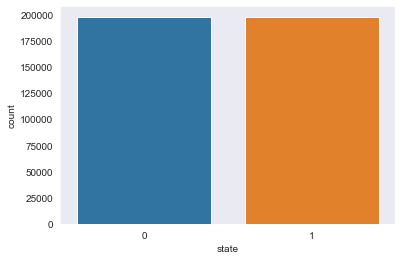

In [23]:
sns.set_style("dark")
sns.countplot(df['state'])

###### MAKING A COPY OF DATA

In [24]:
df_copy = df.copy()

In [25]:
df.head()

,name,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.0,0.0,0,0,GB,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.0,2421.0,0,15,US,100.0,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,Where is Hank?,Narrative Film,Film & Video,45000.0,220.0,0,3,US,220.0,220.0,...,0,0,0,0,0,0,0,0,0,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.0,1.0,0,1,US,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,25000.0,453.0,0,40,US,453.0,453.0,...,0,0,0,0,0,0,0,0,0,1


###### Encoding Country & Main Category and Name

In [26]:
dummy = pd.get_dummies(df[['main_category','country','category']],drop_first=True)

In [27]:
df_ = pd.concat([df,dummy],axis=1,join='inner')

In [28]:
df = df_.copy()

In [29]:
df.drop(columns=['main_category','country','category'],axis=1,inplace=True)

In [30]:
df_ = df.copy()   # WITH NAME

In [31]:
df.head()

,name,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,deadline_day,deadline_month,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,The Songs of Adelaide & Abullah,1000.0,0.0,0,0,0.0,0.0,1533.95,9,10,...,0,0,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,30000.0,2421.0,0,15,100.0,2421.0,30000.00,1,11,...,0,0,0,0,0,0,0,0,0,0
2,Where is Hank?,45000.0,220.0,0,3,220.0,220.0,45000.00,26,2,...,0,0,0,0,0,0,0,0,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,5000.0,1.0,0,1,1.0,1.0,5000.00,16,4,...,0,0,0,0,0,0,0,0,0,0
7,Chaser Strips. Our Strips make Shots their B*tch!,25000.0,453.0,0,40,453.0,453.0,25000.00,17,3,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.drop(columns=['name'],axis=1,inplace=True)

In [36]:
df.drop(columns=['deadline_day','deadline_month'],axis=1,inplace=True)

###### Feature Selection

In [37]:
df.columns[33:]

Index(['main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AU', 'country_BE', 'country_CA',
       ...
       'category_Wearables', 'category_Weaving', 'category_Web',
       'category_Webcomics', 'category_Webseries', 'category_Woodworking',
       'category_Workshops', 'category_World Music', 'category_Young Adult',
       'category_Zines'],
      dtype='object', length=187)

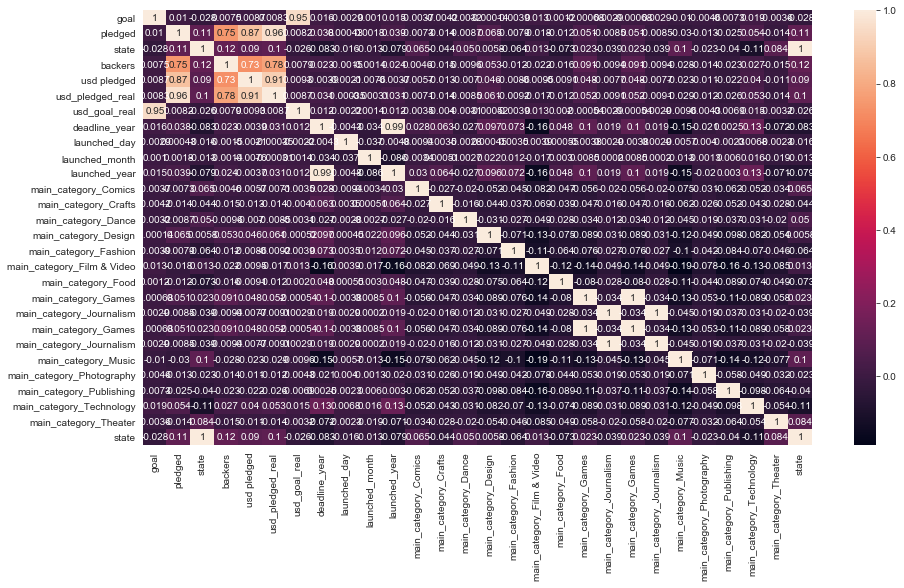

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.loc[:,['goal', 'pledged', 'state', 'backers', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'deadline_year', 'launched_day',
       'launched_month', 'launched_year','main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism','main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater','state']].corr(),annot=True)
plt.show()

In [32]:
df.drop(columns=['deadline_year','goal','pledged','usd pledged','usd_pledged_real','backers'],inplace=True,axis=1)

In [33]:
df.head()

,name,state,usd_goal_real,deadline_day,deadline_month,launched_day,launched_month,launched_year,launched_hour,launched_min,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,The Songs of Adelaide & Abullah,0,1533.95,9,10,11,8,2015,12,12,...,0,0,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,0,30000.00,1,11,2,9,2017,4,43,...,0,0,0,0,0,0,0,0,0,0
2,Where is Hank?,0,45000.00,26,2,12,1,2013,0,20,...,0,0,0,0,0,0,0,0,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,0,5000.00,16,4,17,3,2012,3,24,...,0,0,0,0,0,0,0,0,0,0
7,Chaser Strips. Our Strips make Shots their B*tch!,0,25000.00,17,3,1,2,2016,20,5,...,0,0,0,0,0,0,0,0,0,0


##### Creating Training & Validation Data

In [34]:
Y = df['state']
X = df.drop(columns=['state'],axis=1,inplace=False)

In [35]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=20)

#### Modelling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [53]:
del log

In [55]:
log = LogisticRegression().fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
log.score(X_train,Y_train)

0.585673868719278

In [57]:
log.score(X_test,Y_test)

0.5840403606155247

In [58]:
log_pred = log.predict(X_test)

In [59]:
print(classification_report(log_pred,Y_test))

              precision    recall  f1-score   support

           0       0.34      0.67      0.45     20449
           1       0.83      0.56      0.66     58638

    accuracy                           0.58     79087
   macro avg       0.59      0.61      0.56     79087
weighted avg       0.70      0.58      0.61     79087



In [ ]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("CONFUSION MATRIX LOGISTIC REGRESSION")
sns.heatmap(confusion_matrix(Y_test,log_pred),annot=True,cmap='cool',fmt='')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

###### Model Training

In [102]:
del forest

In [46]:
forest = RandomForestClassifier(max_depth=25).fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###### Model Evaluation

In [47]:
forest.score(X_train,Y_train)

0.7980812088068406

In [48]:
forest.score(X_test,Y_test)

0.7121145068089573

In [50]:
cross_val = cross_val_score(forest,X_test,Y_test,cv=5)

In [51]:
cross_val.mean()

0.6678721508240513

In [52]:
forest_pred = forest.predict(X_test)

In [53]:
print(classification_report(Y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     39702
           1       0.69      0.76      0.72     39385

    accuracy                           0.71     79087
   macro avg       0.71      0.71      0.71     79087
weighted avg       0.71      0.71      0.71     79087



In [ ]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
plt.title("CONFUSION MATRIX RANDOM FOREST")
sns.heatmap(confusion_matrix(Y_test,forest_pred),annot=True,cmap='cool',fmt='')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.show()

### XGB

In [77]:
import xgboost as xgb

In [78]:
xgb_model = xgb.XGBClassifier().fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
xgb_model.score(X_train,Y_train)

In [ ]:
xgb_model.score(X_test,Y_test)

## With Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
df.head()

,name,state,usd_goal_real,deadline_day,deadline_month,launched_day,launched_month,launched_year,launched_hour,launched_min,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,The Songs of Adelaide & Abullah,0,1533.95,9,10,11,8,2015,12,12,...,0,0,0,0,0,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,0,30000.00,1,11,2,9,2017,4,43,...,0,0,0,0,0,0,0,0,0,0
2,Where is Hank?,0,45000.00,26,2,12,1,2013,0,20,...,0,0,0,0,0,0,0,0,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,0,5000.00,16,4,17,3,2012,3,24,...,0,0,0,0,0,0,0,0,0,0
7,Chaser Strips. Our Strips make Shots their B*tch!,0,25000.00,17,3,1,2,2016,20,5,...,0,0,0,0,0,0,0,0,0,0


In [38]:
to_scale = X[['usd_goal_real','launched_day','launched_month','launched_year','launched_hour','launched_min']]

In [39]:
scaler = StandardScaler()

In [40]:
scaled = scaler.fit_transform(to_scale)

In [41]:
scaled_df = pd.DataFrame(scaled,columns=['usd_goal_real','launched_day','launched_month','launched_year','launched_hour','launched_min'])

In [42]:
scaled_df.head()

,usd_goal_real,launched_day,launched_month,launched_year,launched_hour,launched_min
0,-0.034232,-0.482470,0.482633,0.439101,-0.140430,-0.912179
1,-0.006207,-1.502381,0.784896,1.464544,-1.180984,0.804947
2,0.008561,-0.369146,-1.633213,-0.586342,-1.701261,-0.469049
3,-0.030820,0.197472,-1.028686,-1.099063,-1.311053,-0.247485
4,-0.011129,-1.615705,-1.330950,0.951822,0.900124,-1.299917


In [43]:
X.drop(columns=['usd_goal_real','launched_day','launched_month','launched_year','launched_hour','launched_min'],axis=1,inplace=True)

In [44]:
X.reset_index(drop=True,inplace=True)

In [45]:
X = pd.concat([scaled_df,X],axis=1,join='inner')

In [46]:
X.head()

,usd_goal_real,launched_day,launched_month,launched_year,launched_hour,launched_min,name,deadline_day,deadline_month,CAD,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,-0.034232,-0.482470,0.482633,0.439101,-0.140430,-0.912179,The Songs of Adelaide & Abullah,9,10,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.006207,-1.502381,0.784896,1.464544,-1.180984,0.804947,Greeting From Earth: ZGAC Arts Capsule For ET,1,11,0,...,0,0,0,0,0,0,0,0,0,0
2,0.008561,-0.369146,-1.633213,-0.586342,-1.701261,-0.469049,Where is Hank?,26,2,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.030820,0.197472,-1.028686,-1.099063,-1.311053,-0.247485,ToshiCapital Rekordz Needs Help to Complete Album,16,4,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.011129,-1.615705,-1.330950,0.951822,0.900124,-1.299917,Chaser Strips. Our Strips make Shots their B*tch!,17,3,0,...,0,0,0,0,0,0,0,0,0,0


##### Train Test Split

In [72]:
del X['name']

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=22)

### Logistic Regression

In [90]:
log_r = LogisticRegression().fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
log_r.score(X_train,Y_train)

0.6504227978947036

In [92]:
log_r.score(X_test,Y_test)

0.6471607217368215

##### Random Forest

In [105]:
del rfc1

In [106]:
rfc1 = RandomForestClassifier(max_depth=30).fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
rfc1.score(X_train,Y_train)

0.8787810776209518

In [108]:
rfc1.score(X_test,Y_test)

0.7443321911312858

In [109]:
pred = rfc1.predict(X_test)

In [110]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     39375
           1       0.73      0.79      0.76     39712

    accuracy                           0.74     79087
   macro avg       0.75      0.74      0.74     79087
weighted avg       0.75      0.74      0.74     79087

